In [1]:
# pip install pymechkar

In [2]:
# pip install openpyxl

In [3]:
# conda install -c anaconda scikit-learn=0.23

In [4]:
import pyodbc
import sweetviz as sv
import scipy.stats as ss
import copy
from sqlalchemy import create_engine
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import warnings
import copy
# import fancyimpute
from pandas_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import display
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
# from fancyimpute import MICE
%matplotlib inline 
sns.set(color_codes=True)
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

np.random.seed(10)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.linear_model import Lasso
from pyMechkar.analysis import Table1

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.ensemble import RandomForestClassifier

import glob, re
from sklearn import *
from datetime import datetime
from xgboost import XGBRegressor

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [5]:
driver_name = "SQL Server Native Client 11.0"
server = "LAPTOP-ELIRANT\SQLEXPRESS"  # change with your server name
dbname = "DS_project_recruit_restaurant_visitor_forecast"

dbstring = """'Driver={%s};'
              'Server=%s;'
              'Database=%s;'
              'Trusted_Connection=yes;'""" % (driver_name, server, dbname)

In [6]:
conn = pyodbc.connect('Driver={};'
                      'Server={};'
                      'Database={};'
                      'Trusted_Connection=yes;'.format(driver_name, server, dbname))

In [7]:
df = pd.read_sql_query('SELECT * FROM final_table_restaurant',conn)
df

,visit_year,visit_week,week_year_visit,restaurant_id,air_store_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,...,station_name,station_id,station_latitude,station_longitude,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors
0,2016,1,1_2016,8,air_c225148c0fcc5c72,30,30,30,30,1,...,hyogo__kobe-kana__koube,15,34.696667,135.211667,1.277232,1.274882,34.695124,135.197853,57,30
1,2016,1,1_2016,17,air_25d8e5cc57dd87d9,1,1,1,1,1,...,tokyo__tokyo-kana__tonokyo,37,35.691667,139.750000,5.319959,5.318636,35.661777,139.704051,444,1
2,2016,1,1_2016,18,air_1e23210b584540e7,3,3,3,3,1,...,tokyo__tokyo-kana__tonokyo,37,35.691667,139.750000,4.211253,4.202990,35.693840,139.703549,444,3
3,2016,1,1_2016,35,air_57ed725a1930a5b9,78,45,33,39,2,...,tokyo__tokyo-kana__tonokyo,37,35.691667,139.750000,4.211253,4.202990,35.693840,139.703549,444,78
4,2016,1,1_2016,47,air_789466e488705c93,272,68,68,68,4,...,fukuoka__kurume-kana__kurume,4,33.303333,130.493333,2.256617,2.258974,33.319286,130.508374,127,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42276,2017,16,16_2017,825,air_70e9e8cd55879414,76,17,3,10,7,...,tokyo__tokyo-kana__tonokyo,37,35.691667,139.750000,6.027513,6.025058,35.659397,139.696440,444,152
42277,2017,16,16_2017,826,air_8e4360a64dbd4c50,140,36,12,20,7,...,osaka__osaka-kana__osaka,25,34.681667,135.518333,2.736619,2.742844,34.705362,135.510025,74,280
42278,2017,16,16_2017,827,air_f6bfd27e2e174d16,92,31,7,15,6,...,tokyo__tokyo-kana__tonokyo,37,35.691667,139.750000,5.319959,5.318636,35.661777,139.704051,444,184
42279,2017,16,16_2017,828,air_c3dcaf3aeb18e20e,110,28,1,15,7,...,tokyo__tokyo-kana__tonokyo,37,35.691667,139.750000,4.535672,4.541093,35.726232,139.723240,444,220


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42281 entries, 0 to 42280
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   visit_year                             42281 non-null  int64  
 1   visit_week                             42281 non-null  int64  
 2   week_year_visit                        42281 non-null  object 
 3   restaurant_id                          42281 non-null  int64  
 4   air_store_id                           42281 non-null  object 
 5   sum_visitors                           42281 non-null  int64  
 6   max_visitors                           42281 non-null  int64  
 7   min_visitors                           42281 non-null  int64  
 8   avg_visitors                           42281 non-null  int64  
 9   count_visitors                         42281 non-null  int64  
 10  sum_reserve_visitors                   42281 non-null  int64  
 11  ma

In [9]:
for col in df:
    print(col)

visit_year
visit_week
week_year_visit
restaurant_id
air_store_id
sum_visitors
max_visitors
min_visitors
avg_visitors
count_visitors
sum_reserve_visitors
max_reserve_visitors
min_reserve_visitors
avg_reserve_visitors
count_reserve_visitors
sum_diff_days_between_reserve_visit
max_diff_days_between_reserve_visit
min_diff_days_between_reserve_visit
avg_diff_days_between_reserve_visit
count_diff_days_between_reserve_visit
holiday_flg_visit
holiday_week_visit
number_of_holiday_days_visit
area
area_id
genre
genre_id
station_name
station_id
station_latitude
station_longitude
station_vincenty
station_great_circle
restaurant_latitude
restaurant_longitude
number_of_restaurants_in_area
weekend_visitors


In [10]:
categorical_update = ['holiday_flg_visit', 'holiday_week_visit','week_year_visit']


for col in categorical_update:
    df[col] = pd.Categorical(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42281 entries, 0 to 42280
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   visit_year                             42281 non-null  int64   
 1   visit_week                             42281 non-null  int64   
 2   week_year_visit                        42281 non-null  category
 3   restaurant_id                          42281 non-null  int64   
 4   air_store_id                           42281 non-null  object  
 5   sum_visitors                           42281 non-null  int64   
 6   max_visitors                           42281 non-null  int64   
 7   min_visitors                           42281 non-null  int64   
 8   avg_visitors                           42281 non-null  int64   
 9   count_visitors                         42281 non-null  int64   
 10  sum_reserve_visitors                   42281 non-null  int

In [11]:
df.head()

,visit_year,visit_week,week_year_visit,restaurant_id,air_store_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,...,station_name,station_id,station_latitude,station_longitude,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors
0,2016,1,1_2016,8,air_c225148c0fcc5c72,30,30,30,30,1,...,hyogo__kobe-kana__koube,15,34.696667,135.211667,1.277232,1.274882,34.695124,135.197853,57,30
1,2016,1,1_2016,17,air_25d8e5cc57dd87d9,1,1,1,1,1,...,tokyo__tokyo-kana__tonokyo,37,35.691667,139.750000,5.319959,5.318636,35.661777,139.704051,444,1
2,2016,1,1_2016,18,air_1e23210b584540e7,3,3,3,3,1,...,tokyo__tokyo-kana__tonokyo,37,35.691667,139.750000,4.211253,4.202990,35.693840,139.703549,444,3
3,2016,1,1_2016,35,air_57ed725a1930a5b9,78,45,33,39,2,...,tokyo__tokyo-kana__tonokyo,37,35.691667,139.750000,4.211253,4.202990,35.693840,139.703549,444,78
4,2016,1,1_2016,47,air_789466e488705c93,272,68,68,68,4,...,fukuoka__kurume-kana__kurume,4,33.303333,130.493333,2.256617,2.258974,33.319286,130.508374,127,272


In [12]:
df.dtypes

visit_year                                  int64
visit_week                                  int64
week_year_visit                          category
restaurant_id                               int64
air_store_id                               object
sum_visitors                                int64
max_visitors                                int64
min_visitors                                int64
avg_visitors                                int64
count_visitors                              int64
sum_reserve_visitors                        int64
max_reserve_visitors                        int64
min_reserve_visitors                        int64
avg_reserve_visitors                        int64
count_reserve_visitors                      int64
sum_diff_days_between_reserve_visit       float64
max_diff_days_between_reserve_visit       float64
min_diff_days_between_reserve_visit       float64
avg_diff_days_between_reserve_visit       float64
count_diff_days_between_reserve_visit       int64


In [13]:
df.shape

(42281, 37)

In [14]:
df.describe()

,visit_year,visit_week,restaurant_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,sum_reserve_visitors,max_reserve_visitors,...,genre_id,station_id,station_latitude,station_longitude,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors
count,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,...,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000
mean,2016.307585,25.603273,411.601216,144.300088,34.970294,9.524254,20.624394,6.498664,3.684019,0.922873,...,7.547102,25.232114,35.621303,137.377464,3.809104,3.809240,35.619679,137.377824,270.856673,288.502779
std,0.461499,16.359237,238.582144,176.446182,22.776929,9.082440,12.817233,3.618510,17.790161,4.275393,...,4.090423,13.553447,2.048559,3.665738,2.197121,2.196983,2.048732,3.666064,186.315049,352.858942
min,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,33.225000,130.190000,0.416011,0.415906,33.211967,130.195555,14.000000,1.000000
25%,2016.000000,10.000000,205.000000,64.000000,19.000000,3.000000,11.000000,6.000000,0.000000,0.000000,...,4.000000,13.000000,34.681667,135.335000,1.939005,1.936238,34.692337,135.341564,74.000000,128.000000
50%,2016.000000,27.000000,412.000000,111.000000,31.000000,7.000000,18.000000,6.000000,0.000000,0.000000,...,7.000000,34.000000,35.691667,139.620000,3.573166,3.572811,35.658068,139.671958,444.000000,222.000000
75%,2017.000000,40.000000,617.000000,184.000000,47.000000,13.000000,28.000000,7.000000,0.000000,0.000000,...,13.000000,37.000000,35.691667,139.750000,5.319959,5.318636,35.694003,139.751599,444.000000,368.000000
max,2017.000000,53.000000,829.000000,11669.000000,877.000000,372.000000,372.000000,99.000000,489.000000,80.000000,...,14.000000,38.000000,44.016667,144.278333,12.217263,12.189999,44.020632,144.273398,444.000000,23338.000000


In [15]:
#analyzing the dataset
#advert_report = sv.analyze(df)
#display the report
#advert_report.show_html('restaurant_visitor_forecast.html')

In [16]:
df.describe(include='object')

,air_store_id,area,genre,station_name
count,42281,42281,42281,42281
unique,829,9,14,38
top,air_fe22ef5a9cbef123,Tōkyō-to,Izakaya,tokyo__tokyo-kana__tonokyo
freq,69,22450,10156,15573


In [17]:
df.describe(include='all')

,visit_year,visit_week,week_year_visit,restaurant_id,air_store_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,...,station_name,station_id,station_latitude,station_longitude,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors
count,42281.000000,42281.000000,42281,42281.000000,42281,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,...,42281,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000,42281.000000
unique,NaN,NaN,69,NaN,829,NaN,NaN,NaN,NaN,NaN,...,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,16_2017,NaN,air_fe22ef5a9cbef123,NaN,NaN,NaN,NaN,NaN,...,tokyo__tokyo-kana__tonokyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,822,NaN,69,NaN,NaN,NaN,NaN,NaN,...,15573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2016.307585,25.603273,NaN,411.601216,NaN,144.300088,34.970294,9.524254,20.624394,6.498664,...,NaN,25.232114,35.621303,137.377464,3.809104,3.809240,35.619679,137.377824,270.856673,288.502779
std,0.461499,16.359237,NaN,238.582144,NaN,176.446182,22.776929,9.082440,12.817233,3.618510,...,NaN,13.553447,2.048559,3.665738,2.197121,2.196983,2.048732,3.666064,186.315049,352.858942
min,2016.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,1.000000,33.225000,130.190000,0.416011,0.415906,33.211967,130.195555,14.000000,1.000000
25%,2016.000000,10.000000,NaN,205.000000,NaN,64.000000,19.000000,3.000000,11.000000,6.000000,...,NaN,13.000000,34.681667,135.335000,1.939005,1.936238,34.692337,135.341564,74.000000,128.000000
50%,2016.000000,27.000000,NaN,412.000000,NaN,111.000000,31.000000,7.000000,18.000000,6.000000,...,NaN,34.000000,35.691667,139.620000,3.573166,3.572811,35.658068,139.671958,444.000000,222.000000
75%,2017.000000,40.000000,NaN,617.000000,NaN,184.000000,47.000000,13.000000,28.000000,7.000000,...,NaN,37.000000,35.691667,139.750000,5.319959,5.318636,35.694003,139.751599,444.000000,368.000000


In [18]:
# גרפים המתארים את ההתנהגות של כל משתנה
df.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot:title={'center':'visit_year'}>,
        <AxesSubplot:title={'center':'visit_week'}>,
        <AxesSubplot:title={'center':'restaurant_id'}>,
        <AxesSubplot:title={'center':'sum_visitors'}>,
        <AxesSubplot:title={'center':'max_visitors'}>],
       [<AxesSubplot:title={'center':'min_visitors'}>,
        <AxesSubplot:title={'center':'avg_visitors'}>,
        <AxesSubplot:title={'center':'count_visitors'}>,
        <AxesSubplot:title={'center':'sum_reserve_visitors'}>,
        <AxesSubplot:title={'center':'max_reserve_visitors'}>],
       [<AxesSubplot:title={'center':'min_reserve_visitors'}>,
        <AxesSubplot:title={'center':'avg_reserve_visitors'}>,
        <AxesSubplot:title={'center':'count_reserve_visitors'}>,
        <AxesSubplot:title={'center':'sum_diff_days_between_reserve_visit'}>,
        <AxesSubplot:title={'center':'max_diff_days_between_reserve_visit'}>],
       [<AxesSubplot:title={'center':'min_diff_days_between_reserve_visit'}>,
       

In [19]:
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

,visit_year,visit_week,restaurant_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,sum_reserve_visitors,max_reserve_visitors,min_reserve_visitors,avg_reserve_visitors,count_reserve_visitors,sum_diff_days_between_reserve_visit,max_diff_days_between_reserve_visit,min_diff_days_between_reserve_visit,avg_diff_days_between_reserve_visit,count_diff_days_between_reserve_visit,number_of_holiday_days_visit,area_id,genre_id,station_id,station_latitude,station_longitude,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors
visit_year,1.000000,-0.679470,0.006754,0.014119,-0.008612,-0.009468,-0.004038,0.031257,0.114919,0.114459,0.114506,0.114288,0.115119,0.024967,0.010100,-0.003861,-0.026237,0.115119,-0.071571,0.003818,-0.004547,0.003130,-0.000238,0.000939,0.003904,0.003884,0.000087,0.001043,0.005162,0.014455
visit_week,-0.679470,1.000000,0.005963,0.012715,0.012242,-0.007460,0.002615,0.020422,-0.052227,-0.052161,-0.053103,-0.052489,-0.052731,0.159980,0.167582,0.029865,0.189700,-0.052731,0.055886,0.007282,-0.006228,0.005125,0.006434,0.007456,0.004143,0.004161,0.006321,0.007507,0.007670,0.013555
restaurant_id,0.006754,0.005963,1.000000,-0.032682,-0.008792,-0.004565,-0.010851,-0.050447,-0.037046,-0.036183,-0.035235,-0.035862,-0.036862,-0.074891,-0.065567,0.015823,-0.008224,-0.036862,0.000526,-0.054727,0.016306,-0.079479,-0.093137,-0.097175,-0.052579,-0.052958,-0.091892,-0.094444,-0.054694,-0.032681
sum_visitors,0.014119,0.012715,-0.032682,1.000000,0.889769,0.628076,0.919885,0.454764,0.266860,0.263249,0.257076,0.259348,0.266997,0.627218,0.418351,-0.361261,0.060273,0.266997,-0.027455,-0.094988,0.045791,-0.049201,-0.016506,-0.003733,-0.066643,-0.066578,0.004095,0.000840,-0.098290,0.999832
max_visitors,-0.008612,0.012242,-0.008792,0.889769,1.000000,0.576841,0.931424,0.232637,0.115516,0.115320,0.111537,0.113924,0.113516,0.264734,0.211612,-0.016005,0.159307,0.113516,-0.009702,-0.085513,0.044058,-0.043192,-0.009563,0.007791,-0.073029,-0.073869,0.014961,0.012690,-0.093696,0.889064
min_visitors,-0.009468,-0.007460,-0.004565,0.628076,0.576841,1.000000,0.748013,-0.042602,-0.003605,-0.005113,-0.007043,-0.006466,-0.003774,0.213927,0.138064,-0.070444,0.034904,-0.003774,0.024912,-0.021795,-0.048406,0.009520,-0.030863,-0.009724,-0.019902,-0.019733,-0.013935,0.005872,-0.007353,0.627054
avg_visitors,-0.004038,0.002615,-0.010851,0.919885,0.931424,0.748013,1.000000,0.160017,0.128297,0.126792,0.122546,0.124720,0.126990,0.360919,0.256434,-0.110189,0.114604,0.126990,0.016876,-0.070681,0.018174,-0.026537,-0.015823,0.005441,-0.071044,-0.071463,0.008379,0.017322,-0.072573,0.918898
count_visitors,0.031257,0.020422,-0.050447,0.454764,0.232637,-0.042602,0.160017,1.000000,0.349025,0.345273,0.339290,0.341365,0.350384,0.682823,0.443862,-0.496061,-0.001946,0.350384,-0.106704,-0.081026,0.104710,-0.080583,-0.016966,-0.034120,0.000389,-0.001602,-0.011194,-0.058380,-0.083274,0.455437
sum_reserve_visitors,0.114919,-0.052227,-0.037046,0.266860,0.115516,-0.003605,0.128297,0.349025,1.000000,0.999382,0.997961,0.998550,0.999659,0.769247,0.588805,-0.350656,0.235208,0.999659,-0.002451,-0.111392,0.075311,-0.089686,0.003695,-0.018377,-0.073731,-0.072949,0.000023,-0.012909,-0.146384,0.266638
max_reserve_visitors,0.114459,-0.052161,-0.036183,0.263249,0.115320,-0.005113,0.126792,0.345273,0.999382,1.000000,0.998559,0.999551,0.998560,0.445919,0.439393,-0.029902,0.375296,0.998560,-0.002903,-0.110843,0.076654,-0.089873,0.003251,-0.018542,-0.073825,-0.073049,-0.000180,-0.013036,-0.146012,0.263025


In [20]:
#מטריצה קורלציות והצגה בגרף 
plt.figure(figsize=(20,10))
corrMatrix = df.corr(method = 'spearman')
sns.heatmap(corrMatrix ,cmap="BrBG", annot=False)

<AxesSubplot:>

In [21]:
def min_max_values(col):
    """The function takes the column name as the argument
    and returns the top & bottom observation in that dataframe
    """
    
    top = df[col].idxmax()
    top_obs = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bot_obs = pd.DataFrame(df.loc[bottom])
    
    
    min_max_obs = pd.concat([top_obs, bot_obs], axis=1)
    
    return min_max_obs

In [22]:
min_max_values('sum_visitors')

,30024,1
visit_year,2017,2016
visit_week,1,1
week_year_visit,1_2017,1_2016
restaurant_id,793,17
air_store_id,air_8e492076a1179383,air_25d8e5cc57dd87d9
sum_visitors,11669,1
max_visitors,199,1
min_visitors,135,1
avg_visitors,174,1
count_visitors,67,1


In [23]:
sns.boxplot(x=df['sum_visitors'])

<AxesSubplot:xlabel='sum_visitors'>

In [24]:
plt.figure(figsize=(16,5))
sns.histplot(x=df['sum_visitors'],hue=df.holiday_week_visit)

<AxesSubplot:xlabel='sum_visitors', ylabel='Count'>

In [25]:
plt.figure(figsize=(16,5))
sns.histplot(x=df['sum_visitors'],hue=df.number_of_holiday_days_visit)

<AxesSubplot:xlabel='sum_visitors', ylabel='Count'>

In [26]:
# histogram of sum_visitors
plt.hist(df['sum_visitors'])

(array([4.2096e+04, 1.4900e+02, 2.6000e+01, 6.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 1.16780e+03, 2.33460e+03, 3.50140e+03, 4.66820e+03,
        5.83500e+03, 7.00180e+03, 8.16860e+03, 9.33540e+03, 1.05022e+04,
        1.16690e+04]),
 <BarContainer object of 10 artists>)

In [27]:
# pdfs
sns.distplot(df['sum_visitors'])

<AxesSubplot:xlabel='sum_visitors', ylabel='Count'>

In [28]:
box1 = sns.boxplot(x='holiday_week_visit', y='sum_visitors', data=df)

In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# function for outliers - Tomas wrote this (EDA video-data cleansing + check the nutebook of this lesson)

visit_year                                 1.000000
visit_week                                30.000000
restaurant_id                            412.000000
sum_visitors                             120.000000
max_visitors                              28.000000
min_visitors                              10.000000
avg_visitors                              17.000000
count_visitors                             1.000000
sum_reserve_visitors                       0.000000
max_reserve_visitors                       0.000000
min_reserve_visitors                       0.000000
avg_reserve_visitors                       0.000000
count_reserve_visitors                     0.000000
sum_diff_days_between_reserve_visit       70.000000
max_diff_days_between_reserve_visit       19.000000
min_diff_days_between_reserve_visit        1.000000
avg_diff_days_between_reserve_visit        6.000000
count_diff_days_between_reserve_visit      0.000000
number_of_holiday_days_visit               1.000000
area_id     

In [30]:
# correlation with the variable of interest
df_corr = df.corr()['sum_visitors']
df_corr

visit_year                               0.047306
visit_week                              -0.008543
restaurant_id                           -0.035175
sum_visitors                             1.000000
max_visitors                             0.483824
min_visitors                             0.365053
avg_visitors                             0.574418
count_visitors                           0.811609
sum_reserve_visitors                     0.697782
max_reserve_visitors                     0.379990
min_reserve_visitors                     0.169643
avg_reserve_visitors                     0.234406
count_reserve_visitors                   0.779043
sum_diff_days_between_reserve_visit      0.698738
max_diff_days_between_reserve_visit      0.254390
min_diff_days_between_reserve_visit     -0.124209
avg_diff_days_between_reserve_visit     -0.024219
count_diff_days_between_reserve_visit    0.779043
number_of_holiday_days_visit             0.004807
area_id                                 -0.063999


In [31]:
# Finding the null values.
print(df.isnull().sum())

# take what is not missing and split 0-0.25. 0.25-0.5, 0.5-0.75 , 0.75- 1.00. descrive for this and cut.
# 4  interQuantile rate categories + 'unkwown'

visit_year                                   0
visit_week                                   0
week_year_visit                              0
restaurant_id                                0
air_store_id                                 0
sum_visitors                                 0
max_visitors                                 0
min_visitors                                 0
avg_visitors                                 0
count_visitors                               0
sum_reserve_visitors                         0
max_reserve_visitors                         0
min_reserve_visitors                         0
avg_reserve_visitors                         0
count_reserve_visitors                       0
sum_diff_days_between_reserve_visit      39136
max_diff_days_between_reserve_visit      39136
min_diff_days_between_reserve_visit      39136
avg_diff_days_between_reserve_visit      39136
count_diff_days_between_reserve_visit        0
holiday_flg_visit                            0
holiday_week_

In [32]:
groups_diff_days = [1,2,3,4]

In [33]:
df['sum_diff_days_between_reserve_visit'].describe()

count    3145.000000
mean       60.571383
std        79.573546
min         0.000000
25%        11.000000
50%        35.000000
75%        81.000000
max      1029.000000
Name: sum_diff_days_between_reserve_visit, dtype: float64

In [34]:
pd.qcut(df['sum_diff_days_between_reserve_visit'], q=4).value_counts()

(-0.001, 11.0]    800
(35.0, 81.0]      790
(11.0, 35.0]      778
(81.0, 1029.0]    777
Name: sum_diff_days_between_reserve_visit, dtype: int64

In [35]:
df['sum_diff_days_between_reserve_visit_category'] = pd.qcut(df['sum_diff_days_between_reserve_visit'], q=4, labels = groups_diff_days)

In [36]:
df['sum_diff_days_between_reserve_visit_category'].describe()

count     3145
unique       4
top          1
freq       800
Name: sum_diff_days_between_reserve_visit_category, dtype: int64

In [37]:
df.sum_diff_days_between_reserve_visit_category = pd.Categorical(df.sum_diff_days_between_reserve_visit_category)

In [38]:
df['sum_diff_days_between_reserve_visit_category'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4          1
        ... 
42276    NaN
42277    NaN
42278    NaN
42279    NaN
42280    NaN
Name: sum_diff_days_between_reserve_visit_category, Length: 42281, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]>

In [39]:
df['sum_diff_days_between_reserve_visit_category'] = df['sum_diff_days_between_reserve_visit_category'].cat.add_categories(5)

In [40]:
df['sum_diff_days_between_reserve_visit_category'].fillna(5, inplace = True)
df['sum_diff_days_between_reserve_visit_category'].head()

0    5
1    5
2    5
3    5
4    1
Name: sum_diff_days_between_reserve_visit_category, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [41]:
print(df.isnull().sum())

visit_year                                          0
visit_week                                          0
week_year_visit                                     0
restaurant_id                                       0
air_store_id                                        0
sum_visitors                                        0
max_visitors                                        0
min_visitors                                        0
avg_visitors                                        0
count_visitors                                      0
sum_reserve_visitors                                0
max_reserve_visitors                                0
min_reserve_visitors                                0
avg_reserve_visitors                                0
count_reserve_visitors                              0
sum_diff_days_between_reserve_visit             39136
max_diff_days_between_reserve_visit             39136
min_diff_days_between_reserve_visit             39136
avg_diff_days_between_reserv

In [42]:
pd.qcut(df['max_diff_days_between_reserve_visit'], q=4).value_counts()

(-0.001, 7.0]    890
(26.0, 226.0]    765
(7.0, 15.0]      755
(15.0, 26.0]     735
Name: max_diff_days_between_reserve_visit, dtype: int64

In [43]:
df['max_diff_days_between_reserve_visit_category'] = pd.qcut(df['max_diff_days_between_reserve_visit'], q=4, labels = groups_diff_days)
df['max_diff_days_between_reserve_visit_category']

0        NaN
1        NaN
2        NaN
3        NaN
4          1
        ... 
42276    NaN
42277    NaN
42278    NaN
42279    NaN
42280    NaN
Name: max_diff_days_between_reserve_visit_category, Length: 42281, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [44]:
df.max_diff_days_between_reserve_visit_category = pd.Categorical(df.max_diff_days_between_reserve_visit_category)

In [45]:
df['max_diff_days_between_reserve_visit_category'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4          1
        ... 
42276    NaN
42277    NaN
42278    NaN
42279    NaN
42280    NaN
Name: max_diff_days_between_reserve_visit_category, Length: 42281, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]>

In [46]:
df['max_diff_days_between_reserve_visit_category'] = df['max_diff_days_between_reserve_visit_category'].cat.add_categories(5)

In [47]:
df['max_diff_days_between_reserve_visit_category'].fillna(5, inplace = True)
df['max_diff_days_between_reserve_visit_category'].head()

0    5
1    5
2    5
3    5
4    1
Name: max_diff_days_between_reserve_visit_category, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [48]:
pd.qcut(df['avg_diff_days_between_reserve_visit'], q=4).value_counts()

(-0.001, 2.0]    1033
(4.0, 8.0]        785
(2.0, 4.0]        677
(8.0, 95.0]       650
Name: avg_diff_days_between_reserve_visit, dtype: int64

In [49]:
df['avg_diff_days_between_reserve_visit_category'] = pd.qcut(df['avg_diff_days_between_reserve_visit'], q=4, labels = groups_diff_days)
df['avg_diff_days_between_reserve_visit_category']

0        NaN
1        NaN
2        NaN
3        NaN
4          1
        ... 
42276    NaN
42277    NaN
42278    NaN
42279    NaN
42280    NaN
Name: avg_diff_days_between_reserve_visit_category, Length: 42281, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [50]:
df.avg_diff_days_between_reserve_visit_category = pd.Categorical(df.avg_diff_days_between_reserve_visit_category)
df['avg_diff_days_between_reserve_visit_category'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4          1
        ... 
42276    NaN
42277    NaN
42278    NaN
42279    NaN
42280    NaN
Name: avg_diff_days_between_reserve_visit_category, Length: 42281, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]>

In [51]:
df['avg_diff_days_between_reserve_visit_category'] = df['avg_diff_days_between_reserve_visit_category'].cat.add_categories(5)

In [52]:
df['avg_diff_days_between_reserve_visit_category'].fillna(5, inplace = True)
df['avg_diff_days_between_reserve_visit_category'].head()

0    5
1    5
2    5
3    5
4    1
Name: avg_diff_days_between_reserve_visit_category, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [53]:
pd.cut(df['min_diff_days_between_reserve_visit'], bins=4).value_counts()

(-0.095, 23.75]    3123
(23.75, 47.5]        18
(71.25, 95.0]         2
(47.5, 71.25]         2
Name: min_diff_days_between_reserve_visit, dtype: int64

In [54]:
df['min_diff_days_between_reserve_visit_category']=pd.cut(df['min_diff_days_between_reserve_visit'], bins=4, labels = groups_diff_days)
df['min_diff_days_between_reserve_visit_category']

0        NaN
1        NaN
2        NaN
3        NaN
4          1
        ... 
42276    NaN
42277    NaN
42278    NaN
42279    NaN
42280    NaN
Name: min_diff_days_between_reserve_visit_category, Length: 42281, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [55]:
df['min_diff_days_between_reserve_visit_category'].describe()

count     3145
unique       4
top          1
freq      3123
Name: min_diff_days_between_reserve_visit_category, dtype: int64

In [56]:
df['min_diff_days_between_reserve_visit_category'] = df['min_diff_days_between_reserve_visit_category'].cat.add_categories(5)

In [57]:
df['min_diff_days_between_reserve_visit_category']

0        NaN
1        NaN
2        NaN
3        NaN
4          1
        ... 
42276    NaN
42277    NaN
42278    NaN
42279    NaN
42280    NaN
Name: min_diff_days_between_reserve_visit_category, Length: 42281, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [58]:
df['min_diff_days_between_reserve_visit_category'].fillna(5, inplace = True)
df['min_diff_days_between_reserve_visit_category'].head()

0    5
1    5
2    5
3    5
4    1
Name: min_diff_days_between_reserve_visit_category, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [59]:
print(df.isnull().sum())

visit_year                                          0
visit_week                                          0
week_year_visit                                     0
restaurant_id                                       0
air_store_id                                        0
sum_visitors                                        0
max_visitors                                        0
min_visitors                                        0
avg_visitors                                        0
count_visitors                                      0
sum_reserve_visitors                                0
max_reserve_visitors                                0
min_reserve_visitors                                0
avg_reserve_visitors                                0
count_reserve_visitors                              0
sum_diff_days_between_reserve_visit             39136
max_diff_days_between_reserve_visit             39136
min_diff_days_between_reserve_visit             39136
avg_diff_days_between_reserv

In [60]:
df = df.drop(columns=['sum_diff_days_between_reserve_visit', 'max_diff_days_between_reserve_visit','min_diff_days_between_reserve_visit','avg_diff_days_between_reserve_visit'])

In [61]:
df.isnull().sum()

visit_year                                      0
visit_week                                      0
week_year_visit                                 0
restaurant_id                                   0
air_store_id                                    0
sum_visitors                                    0
max_visitors                                    0
min_visitors                                    0
avg_visitors                                    0
count_visitors                                  0
sum_reserve_visitors                            0
max_reserve_visitors                            0
min_reserve_visitors                            0
avg_reserve_visitors                            0
count_reserve_visitors                          0
count_diff_days_between_reserve_visit           0
holiday_flg_visit                               0
holiday_week_visit                              0
number_of_holiday_days_visit                    0
area                                            0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42281 entries, 0 to 42280
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   visit_year                                    42281 non-null  int64   
 1   visit_week                                    42281 non-null  int64   
 2   week_year_visit                               42281 non-null  category
 3   restaurant_id                                 42281 non-null  int64   
 4   air_store_id                                  42281 non-null  object  
 5   sum_visitors                                  42281 non-null  int64   
 6   max_visitors                                  42281 non-null  int64   
 7   min_visitors                                  42281 non-null  int64   
 8   avg_visitors                                  42281 non-null  int64   
 9   count_visitors                                4228

In [63]:
df.hist()

array([[<AxesSubplot:title={'center':'visit_year'}>,
        <AxesSubplot:title={'center':'visit_week'}>,
        <AxesSubplot:title={'center':'restaurant_id'}>,
        <AxesSubplot:title={'center':'sum_visitors'}>,
        <AxesSubplot:title={'center':'max_visitors'}>],
       [<AxesSubplot:title={'center':'min_visitors'}>,
        <AxesSubplot:title={'center':'avg_visitors'}>,
        <AxesSubplot:title={'center':'count_visitors'}>,
        <AxesSubplot:title={'center':'sum_reserve_visitors'}>,
        <AxesSubplot:title={'center':'max_reserve_visitors'}>],
       [<AxesSubplot:title={'center':'min_reserve_visitors'}>,
        <AxesSubplot:title={'center':'avg_reserve_visitors'}>,
        <AxesSubplot:title={'center':'count_reserve_visitors'}>,
        <AxesSubplot:title={'center':'count_diff_days_between_reserve_visit'}>,
        <AxesSubplot:title={'center':'number_of_holiday_days_visit'}>],
       [<AxesSubplot:title={'center':'area_id'}>,
        <AxesSubplot:title={'center':'ge

In [64]:
# plotting significant correlation in one plot (heatmap)
corr = df.drop('sum_visitors', axis=1).corr()
sns.heatmap(corr[(corr >=0.5) | (corr <= -0.4)],
           cmap ='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size":8}, square=True);

In [65]:
df

,visit_year,visit_week,week_year_visit,restaurant_id,air_store_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,...,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors,sum_diff_days_between_reserve_visit_category,max_diff_days_between_reserve_visit_category,avg_diff_days_between_reserve_visit_category,min_diff_days_between_reserve_visit_category
0,2016,1,1_2016,8,air_c225148c0fcc5c72,30,30,30,30,1,...,1.277232,1.274882,34.695124,135.197853,57,30,5,5,5,5
1,2016,1,1_2016,17,air_25d8e5cc57dd87d9,1,1,1,1,1,...,5.319959,5.318636,35.661777,139.704051,444,1,5,5,5,5
2,2016,1,1_2016,18,air_1e23210b584540e7,3,3,3,3,1,...,4.211253,4.202990,35.693840,139.703549,444,3,5,5,5,5
3,2016,1,1_2016,35,air_57ed725a1930a5b9,78,45,33,39,2,...,4.211253,4.202990,35.693840,139.703549,444,78,5,5,5,5
4,2016,1,1_2016,47,air_789466e488705c93,272,68,68,68,4,...,2.256617,2.258974,33.319286,130.508374,127,272,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42276,2017,16,16_2017,825,air_70e9e8cd55879414,76,17,3,10,7,...,6.027513,6.025058,35.659397,139.696440,444,152,5,5,5,5
42277,2017,16,16_2017,826,air_8e4360a64dbd4c50,140,36,12,20,7,...,2.736619,2.742844,34.705362,135.510025,74,280,5,5,5,5
42278,2017,16,16_2017,827,air_f6bfd27e2e174d16,92,31,7,15,6,...,5.319959,5.318636,35.661777,139.704051,444,184,5,5,5,5
42279,2017,16,16_2017,828,air_c3dcaf3aeb18e20e,110,28,1,15,7,...,4.535672,4.541093,35.726232,139.723240,444,220,5,5,5,5


In [66]:
df.dtypes

visit_year                                         int64
visit_week                                         int64
week_year_visit                                 category
restaurant_id                                      int64
air_store_id                                      object
sum_visitors                                       int64
max_visitors                                       int64
min_visitors                                       int64
avg_visitors                                       int64
count_visitors                                     int64
sum_reserve_visitors                               int64
max_reserve_visitors                               int64
min_reserve_visitors                               int64
avg_reserve_visitors                               int64
count_reserve_visitors                             int64
count_diff_days_between_reserve_visit              int64
holiday_flg_visit                               category
holiday_week_visit             

In [67]:
# analyzing the dataset
# advert_report = sv.analyze(df)
# display the report
# advert_report.show_html('restaurant_visitor_forecast.html')

In [68]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

visit_year                                 1.000000
visit_week                                30.000000
restaurant_id                            412.000000
sum_visitors                             120.000000
max_visitors                              28.000000
min_visitors                              10.000000
avg_visitors                              17.000000
count_visitors                             1.000000
sum_reserve_visitors                       0.000000
max_reserve_visitors                       0.000000
min_reserve_visitors                       0.000000
avg_reserve_visitors                       0.000000
count_reserve_visitors                     0.000000
count_diff_days_between_reserve_visit      0.000000
number_of_holiday_days_visit               1.000000
area_id                                    3.000000
genre_id                                   9.000000
station_id                                24.000000
station_latitude                           1.010000
station_long

In [69]:
fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Outliers exploration')
sns.boxplot(ax=axes[0, 0], x="sum_visitors", data = df)
sns.boxplot(ax=axes[1,1], x="number_of_restaurants_in_area", data = df)
sns.boxplot(ax=axes[1, 0], x="weekend_visitors", data = df)

<AxesSubplot:xlabel='weekend_visitors'>

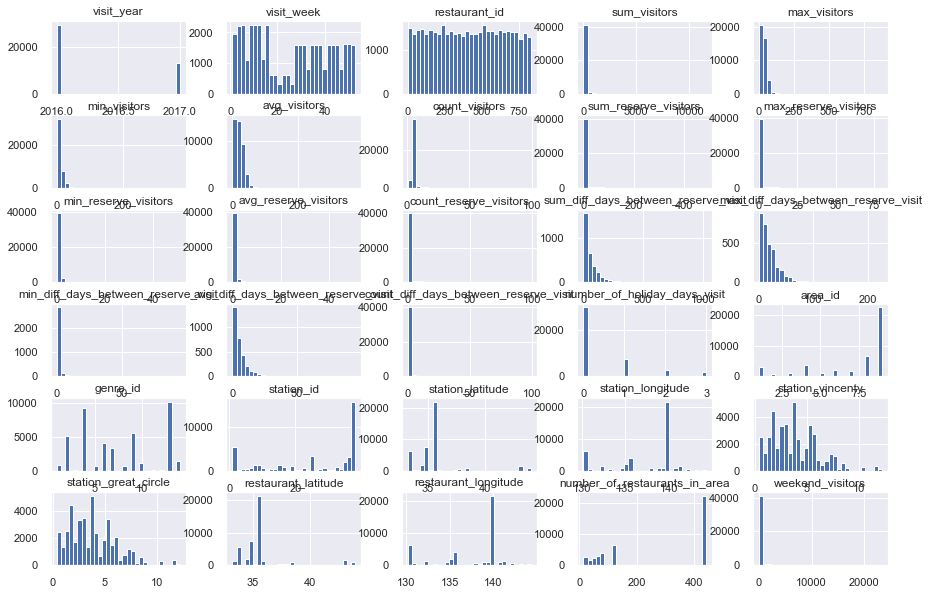

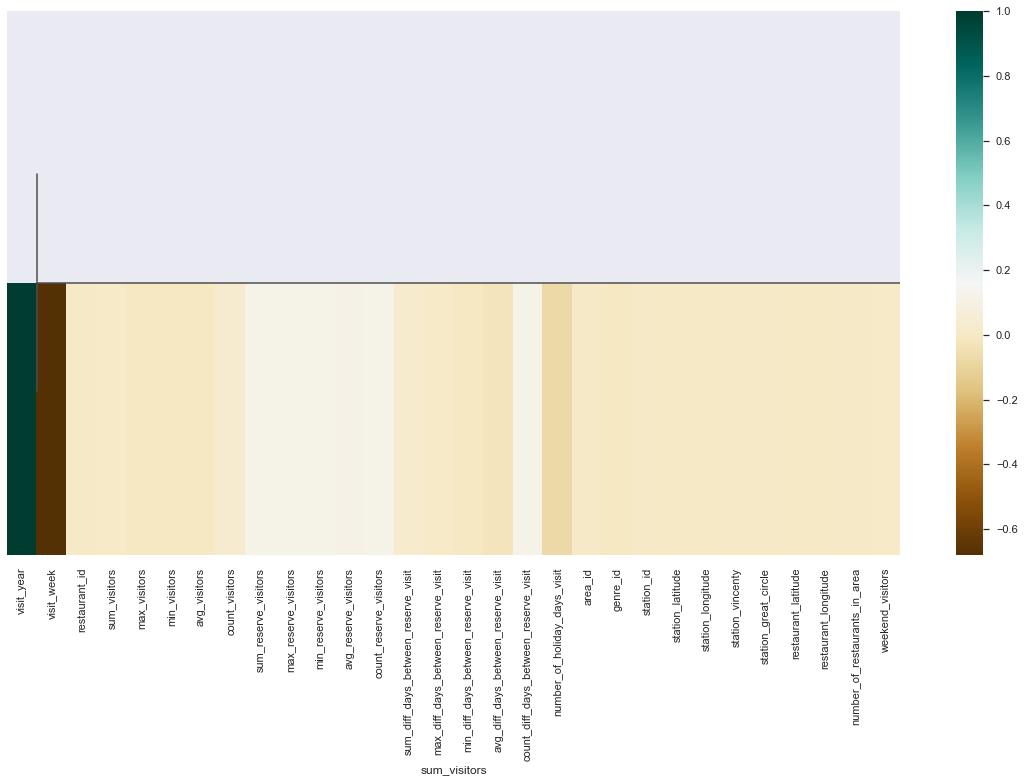

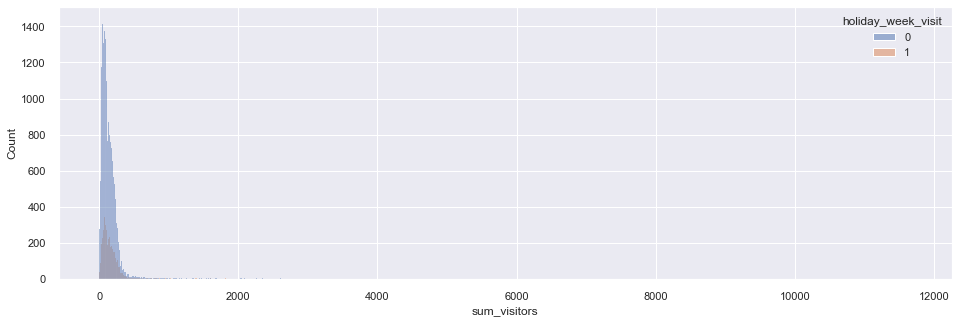

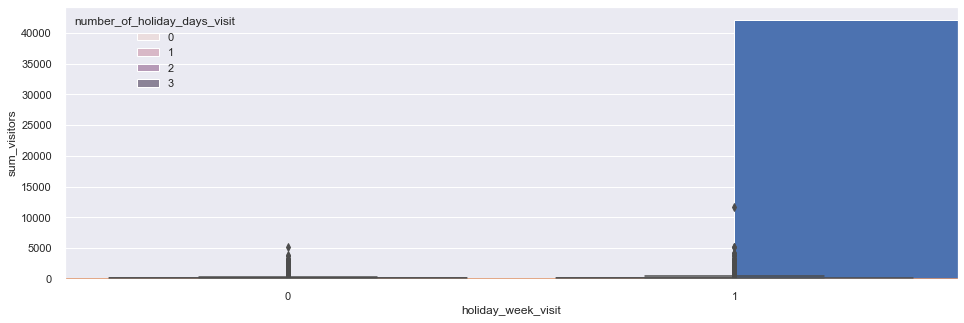

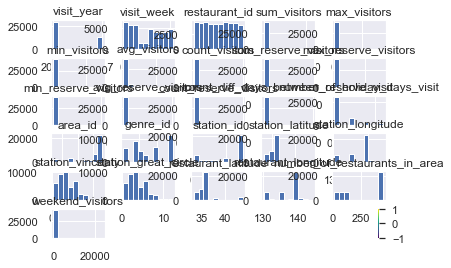

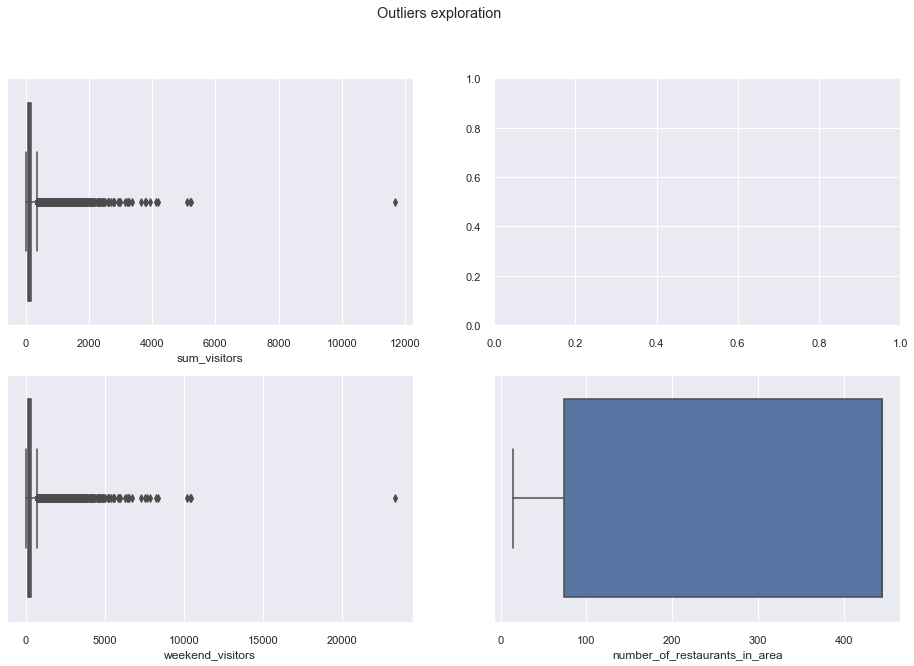

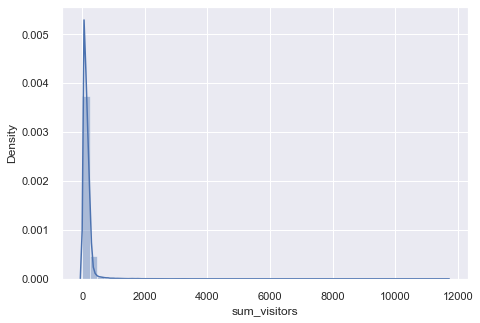

In [70]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sum_visitors'])
plt.show()

In [71]:
sns.boxplot(df['sum_visitors'])

<AxesSubplot:xlabel='sum_visitors'>

In [72]:
df_corr = df.corr()['restaurant_latitude']
df_corr
# station_latitude is almost same

visit_year                               0.002341
visit_week                               0.009772
restaurant_id                           -0.048096
sum_visitors                             0.045013
max_visitors                             0.038868
min_visitors                            -0.048757
avg_visitors                             0.009371
count_visitors                           0.065504
sum_reserve_visitors                     0.083942
max_reserve_visitors                     0.074134
min_reserve_visitors                     0.059350
avg_reserve_visitors                     0.067283
count_reserve_visitors                   0.078941
count_diff_days_between_reserve_visit    0.078941
number_of_holiday_days_visit            -0.000332
area_id                                 -0.082754
genre_id                                 0.039643
station_id                               0.069752
station_latitude                         0.999917
station_longitude                        0.650773


In [73]:
df_corr = df.corr()['restaurant_longitude']
df_corr
# station_longitude is almost same

visit_year                               0.002334
visit_week                               0.006425
restaurant_id                           -0.091767
sum_visitors                            -0.001879
max_visitors                            -0.008252
min_visitors                            -0.014116
avg_visitors                            -0.006624
count_visitors                          -0.002190
sum_reserve_visitors                    -0.008628
max_reserve_visitors                    -0.028906
min_reserve_visitors                    -0.015423
avg_reserve_visitors                    -0.027318
count_reserve_visitors                  -0.000096
count_diff_days_between_reserve_visit   -0.000096
number_of_holiday_days_visit            -0.002311
area_id                                  0.227818
genre_id                                -0.023365
station_id                               0.763457
station_latitude                         0.652225
station_longitude                        0.999951


In [74]:
df = df.drop(columns=['station_longitude', 'station_latitude'])

In [75]:
print(IQR)

visit_year                                 1.000000
visit_week                                30.000000
restaurant_id                            412.000000
sum_visitors                             120.000000
max_visitors                              28.000000
min_visitors                              10.000000
avg_visitors                              17.000000
count_visitors                             1.000000
sum_reserve_visitors                       0.000000
max_reserve_visitors                       0.000000
min_reserve_visitors                       0.000000
avg_reserve_visitors                       0.000000
count_reserve_visitors                     0.000000
count_diff_days_between_reserve_visit      0.000000
number_of_holiday_days_visit               1.000000
area_id                                    3.000000
genre_id                                   9.000000
station_id                                24.000000
station_latitude                           1.010000
station_long

In [76]:
# 3  Finding the IQR
percentile25_sum_visitors = df['sum_visitors'].quantile(0.25)
percentile75_sum_visitors = df['sum_visitors'].quantile(0.75)
IQR_sum_visitors = percentile75_sum_visitors - percentile25_sum_visitors
print(IQR_sum_visitors)

120.0


In [77]:
# 4 Finding upper and lower limit
upper_limit_sum_visitors = percentile75_sum_visitors + 1.5 * IQR_sum_visitors
lower_limit_sum_visitors = percentile25_sum_visitors - 1.5 * IQR_sum_visitors

In [78]:
# 5 Finding Outliers
df[df['sum_visitors'] > upper_limit_sum_visitors]
df[df['sum_visitors'] < lower_limit_sum_visitors]

,visit_year,visit_week,week_year_visit,restaurant_id,air_store_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,...,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors,sum_diff_days_between_reserve_visit_category,max_diff_days_between_reserve_visit_category,avg_diff_days_between_reserve_visit_category,min_diff_days_between_reserve_visit_category


In [79]:
# 6 Trimming
new_df_sum_visitors = df[df['sum_visitors'] < upper_limit_sum_visitors]
new_df_sum_visitors.shape

(40962, 35)

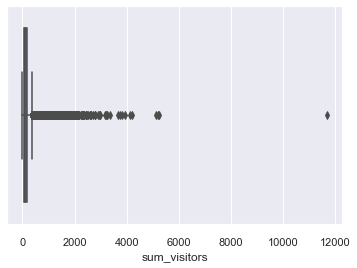

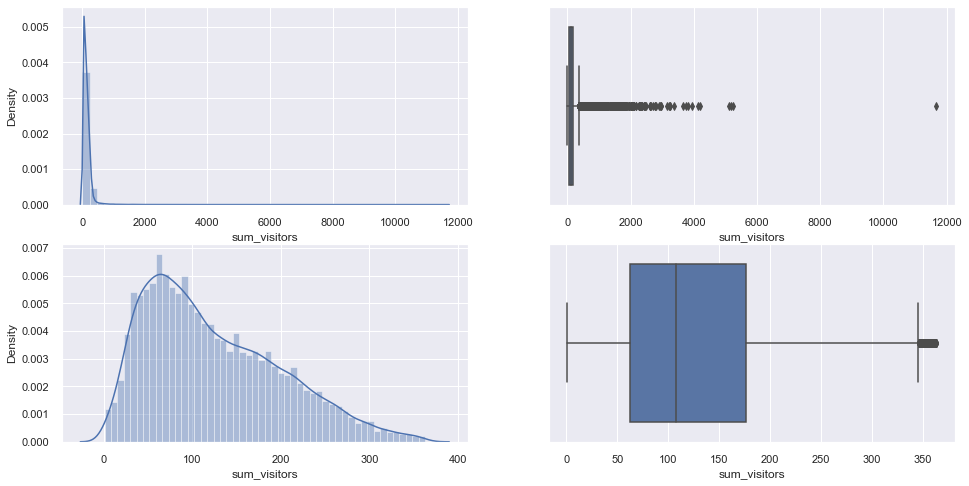

In [80]:
# 7 Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['sum_visitors'])
plt.subplot(2,2,2)
sns.boxplot(df['sum_visitors'])
plt.subplot(2,2,3)
sns.distplot(new_df_sum_visitors['sum_visitors'])
plt.subplot(2,2,4)
sns.boxplot(new_df_sum_visitors['sum_visitors'])
plt.show()

In [81]:
# 8 Capping
new_df_cap_sum_visitors = df.copy()
new_df_cap_sum_visitors['sum_visitors'] = np.where(
    new_df_cap_sum_visitors['sum_visitors'] > upper_limit_sum_visitors,
    upper_limit_sum_visitors,
    np.where(
        new_df_cap_sum_visitors['sum_visitors'] < lower_limit_sum_visitors,
        lower_limit_sum_visitors,
        new_df_cap_sum_visitors['sum_visitors']
    )
)

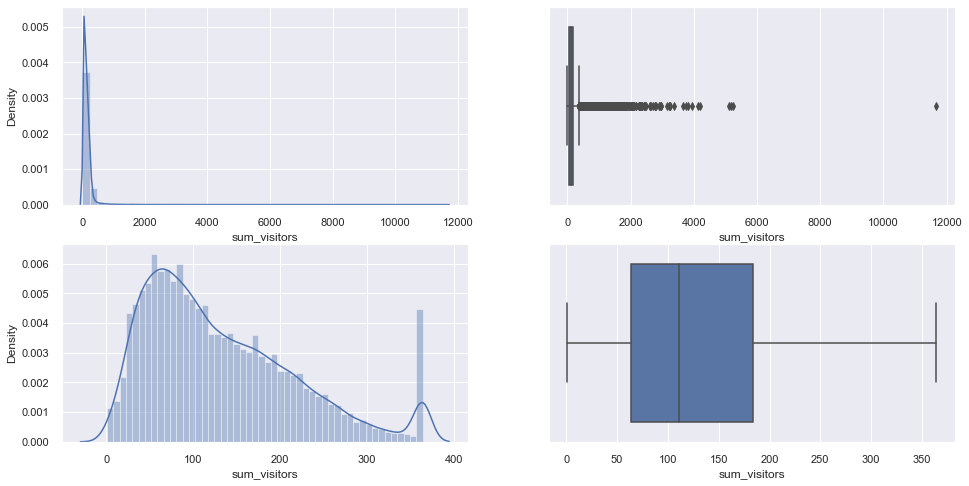

In [82]:
# 9 Compare the plots after capping
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['sum_visitors'])
plt.subplot(2,2,2)
sns.boxplot(df['sum_visitors'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_sum_visitors['sum_visitors'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_sum_visitors['sum_visitors'])
plt.show()

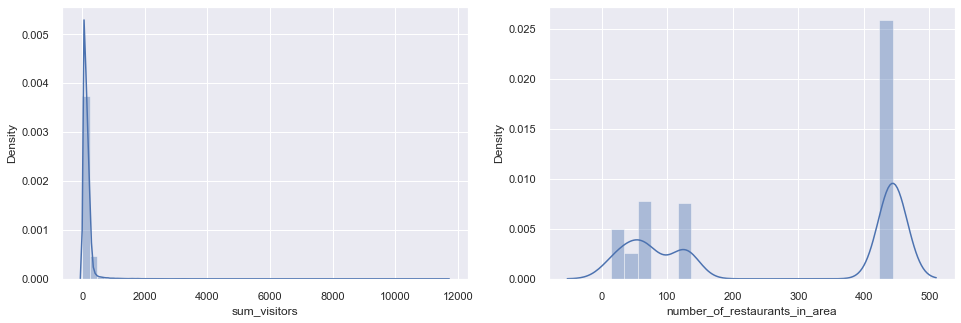

In [83]:
# 2   Plot the distribution plot for the features
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sum_visitors'])
plt.subplot(1,2,2)
sns.distplot(df['number_of_restaurants_in_area'])
plt.show()

In [84]:
# 3  Finding the IQR
percentile25_number_of_restaurants_in_area = df['number_of_restaurants_in_area'].quantile(0.25)
percentile75_number_of_restaurants_in_area = df['number_of_restaurants_in_area'].quantile(0.75)
IQR_number_of_restaurants_in_area = percentile75_number_of_restaurants_in_area - percentile25_number_of_restaurants_in_area
print(IQR_number_of_restaurants_in_area)

370.0


In [85]:
# 4 Finding upper and lower limit
upper_limit_number_of_restaurants_in_area = percentile75_number_of_restaurants_in_area + 1.5 * IQR_number_of_restaurants_in_area
lower_limit_number_of_restaurants_in_area = percentile25_number_of_restaurants_in_area - 1.5 * IQR_number_of_restaurants_in_area

In [86]:
# 5 Finding Outliers
df[df['number_of_restaurants_in_area'] > upper_limit_number_of_restaurants_in_area]
df[df['number_of_restaurants_in_area'] < lower_limit_number_of_restaurants_in_area]

,visit_year,visit_week,week_year_visit,restaurant_id,air_store_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,...,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors,sum_diff_days_between_reserve_visit_category,max_diff_days_between_reserve_visit_category,avg_diff_days_between_reserve_visit_category,min_diff_days_between_reserve_visit_category


In [87]:
# 6 Trimming
new_df_number_of_restaurants_in_area = df[df['number_of_restaurants_in_area'] < upper_limit_number_of_restaurants_in_area]
new_df_number_of_restaurants_in_area.shape

(42281, 35)

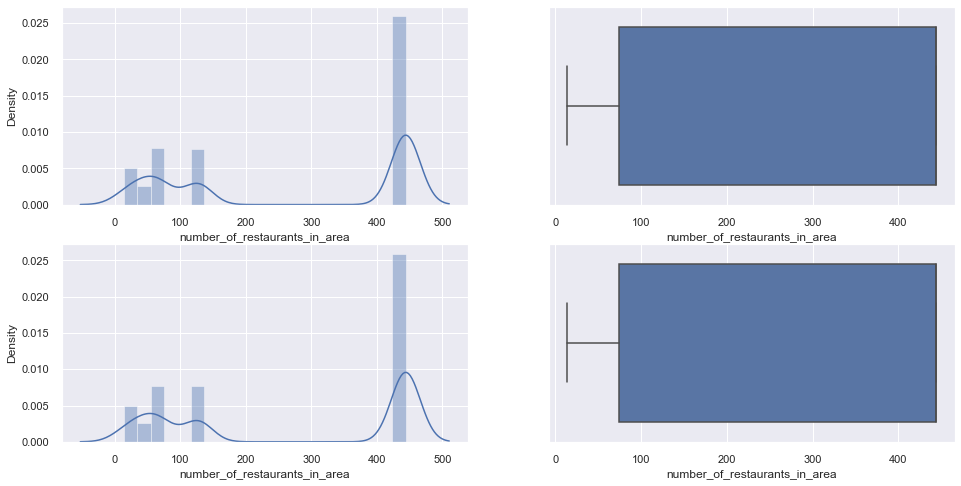

In [88]:
# 7 Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['number_of_restaurants_in_area'])
plt.subplot(2,2,2)
sns.boxplot(df['number_of_restaurants_in_area'])
plt.subplot(2,2,3)
sns.distplot(new_df_number_of_restaurants_in_area['number_of_restaurants_in_area'])
plt.subplot(2,2,4)
sns.boxplot(new_df_number_of_restaurants_in_area['number_of_restaurants_in_area'])
plt.show()

In [89]:
# 8 Capping
new_df_cap_number_of_restaurants_in_area = df.copy()
new_df_cap_number_of_restaurants_in_area['number_of_restaurants_in_area'] = np.where(
    new_df_cap_number_of_restaurants_in_area['number_of_restaurants_in_area'] > upper_limit_number_of_restaurants_in_area,
    upper_limit_number_of_restaurants_in_area,
    np.where(
        new_df_cap_number_of_restaurants_in_area['number_of_restaurants_in_area'] < lower_limit_number_of_restaurants_in_area,
        lower_limit_number_of_restaurants_in_area,
        new_df_cap_number_of_restaurants_in_area['number_of_restaurants_in_area']
    )
)

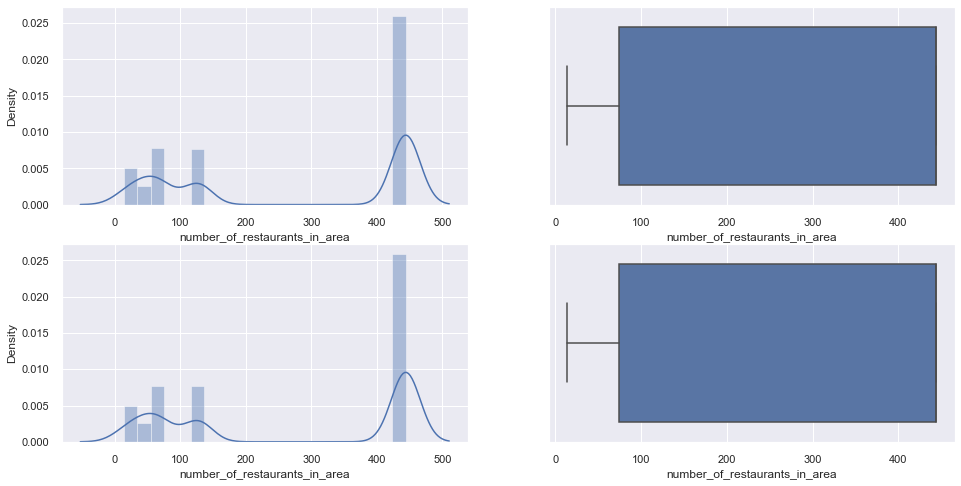

In [90]:
# 9 Compare the plots after capping
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['number_of_restaurants_in_area'])
plt.subplot(2,2,2)
sns.boxplot(df['number_of_restaurants_in_area'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_number_of_restaurants_in_area['number_of_restaurants_in_area'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_number_of_restaurants_in_area['number_of_restaurants_in_area'])
plt.show()

In [91]:
new_df_cap_number_of_restaurants_in_area

,visit_year,visit_week,week_year_visit,restaurant_id,air_store_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,...,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors,sum_diff_days_between_reserve_visit_category,max_diff_days_between_reserve_visit_category,avg_diff_days_between_reserve_visit_category,min_diff_days_between_reserve_visit_category
0,2016,1,1_2016,8,air_c225148c0fcc5c72,30,30,30,30,1,...,1.277232,1.274882,34.695124,135.197853,57.0,30,5,5,5,5
1,2016,1,1_2016,17,air_25d8e5cc57dd87d9,1,1,1,1,1,...,5.319959,5.318636,35.661777,139.704051,444.0,1,5,5,5,5
2,2016,1,1_2016,18,air_1e23210b584540e7,3,3,3,3,1,...,4.211253,4.202990,35.693840,139.703549,444.0,3,5,5,5,5
3,2016,1,1_2016,35,air_57ed725a1930a5b9,78,45,33,39,2,...,4.211253,4.202990,35.693840,139.703549,444.0,78,5,5,5,5
4,2016,1,1_2016,47,air_789466e488705c93,272,68,68,68,4,...,2.256617,2.258974,33.319286,130.508374,127.0,272,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42276,2017,16,16_2017,825,air_70e9e8cd55879414,76,17,3,10,7,...,6.027513,6.025058,35.659397,139.696440,444.0,152,5,5,5,5
42277,2017,16,16_2017,826,air_8e4360a64dbd4c50,140,36,12,20,7,...,2.736619,2.742844,34.705362,135.510025,74.0,280,5,5,5,5
42278,2017,16,16_2017,827,air_f6bfd27e2e174d16,92,31,7,15,6,...,5.319959,5.318636,35.661777,139.704051,444.0,184,5,5,5,5
42279,2017,16,16_2017,828,air_c3dcaf3aeb18e20e,110,28,1,15,7,...,4.535672,4.541093,35.726232,139.723240,444.0,220,5,5,5,5


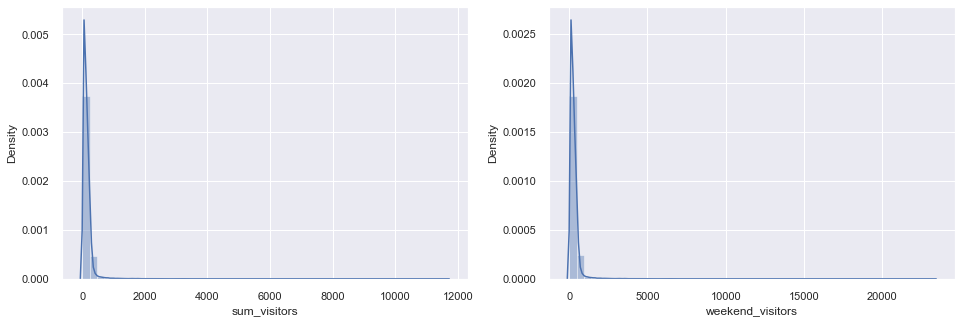

In [92]:
# 2   Plot the distribution plot for the features
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sum_visitors'])
plt.subplot(1,2,2)
sns.distplot(df['weekend_visitors'])
plt.show()

In [93]:
# 3  Finding the IQR
percentile25_weekend_visitors = df['weekend_visitors'].quantile(0.25)
percentile75_weekend_visitors = df['weekend_visitors'].quantile(0.75)
IQR_weekend_visitors = percentile75_weekend_visitors - percentile25_weekend_visitors
print(IQR_weekend_visitors)

240.0


In [94]:
# 4 Finding upper and lower limit
upper_limit_weekend_visitors = percentile75_weekend_visitors + 1.5 * IQR_weekend_visitors
lower_limit_weekend_visitors = percentile25_weekend_visitors - 1.5 * IQR_weekend_visitors

In [95]:
# 5 Finding Outliers
df[df['weekend_visitors'] > upper_limit_weekend_visitors]
df[df['weekend_visitors'] < lower_limit_weekend_visitors]

,visit_year,visit_week,week_year_visit,restaurant_id,air_store_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,...,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors,sum_diff_days_between_reserve_visit_category,max_diff_days_between_reserve_visit_category,avg_diff_days_between_reserve_visit_category,min_diff_days_between_reserve_visit_category


In [96]:
# 6 Trimming
new_df_weekend_visitors = df[df['weekend_visitors'] < upper_limit_weekend_visitors]
new_df_weekend_visitors.shape

(40963, 35)

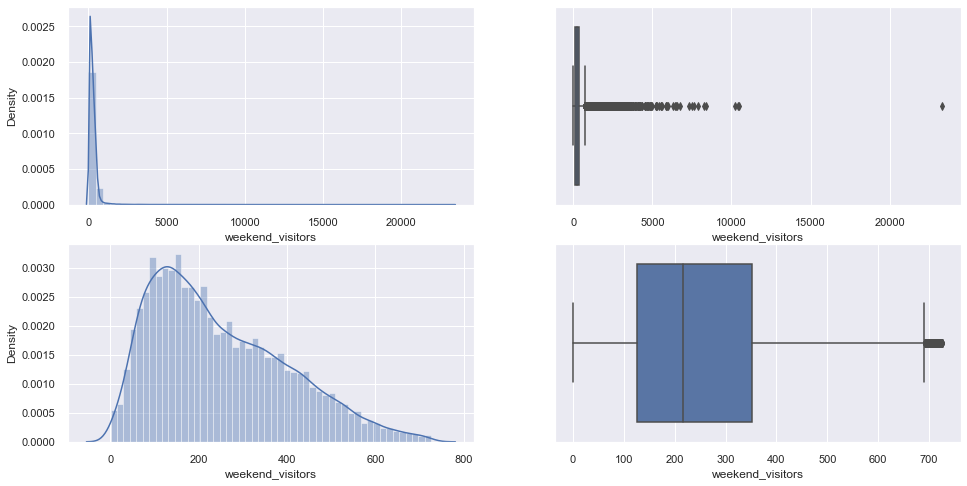

In [97]:
# 7 Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['weekend_visitors'])
plt.subplot(2,2,2)
sns.boxplot(df['weekend_visitors'])
plt.subplot(2,2,3)
sns.distplot(new_df_sum_visitors['weekend_visitors'])
plt.subplot(2,2,4)
sns.boxplot(new_df_sum_visitors['weekend_visitors'])
plt.show()

In [98]:
# 8 Capping
new_df_cap_weekend_visitors = df.copy()
new_df_cap_weekend_visitors['weekend_visitors'] = np.where(
    new_df_cap_weekend_visitors['weekend_visitors'] > upper_limit_weekend_visitors,
    upper_limit_weekend_visitors,
    np.where(
        new_df_cap_weekend_visitors['weekend_visitors'] < lower_limit_weekend_visitors,
        lower_limit_weekend_visitors,
        new_df_cap_weekend_visitors['weekend_visitors']
    )
)

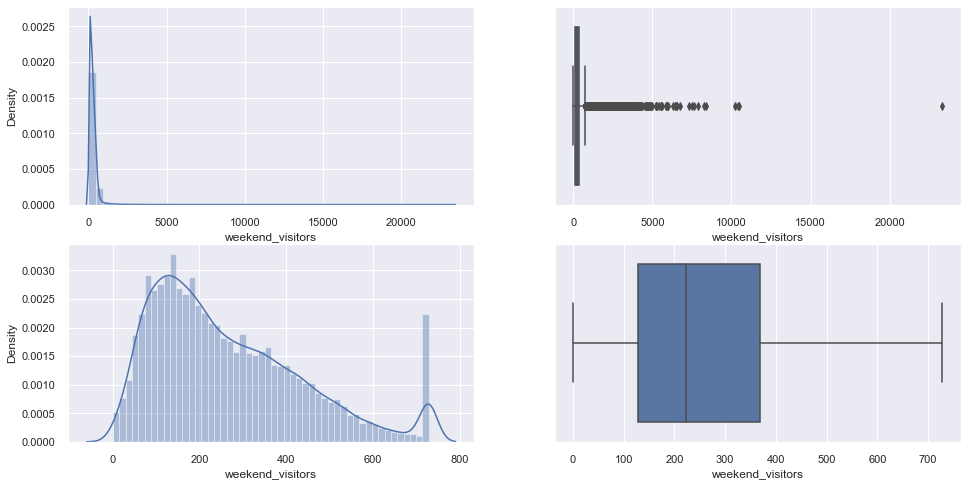

In [99]:
# 9 Compare the plots after capping
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['weekend_visitors'])
plt.subplot(2,2,2)
sns.boxplot(df['weekend_visitors'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_weekend_visitors['weekend_visitors'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_weekend_visitors['weekend_visitors'])
plt.show()

In [100]:
new_df_cap_weekend_visitors

,visit_year,visit_week,week_year_visit,restaurant_id,air_store_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,...,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors,sum_diff_days_between_reserve_visit_category,max_diff_days_between_reserve_visit_category,avg_diff_days_between_reserve_visit_category,min_diff_days_between_reserve_visit_category
0,2016,1,1_2016,8,air_c225148c0fcc5c72,30,30,30,30,1,...,1.277232,1.274882,34.695124,135.197853,57,30.0,5,5,5,5
1,2016,1,1_2016,17,air_25d8e5cc57dd87d9,1,1,1,1,1,...,5.319959,5.318636,35.661777,139.704051,444,1.0,5,5,5,5
2,2016,1,1_2016,18,air_1e23210b584540e7,3,3,3,3,1,...,4.211253,4.202990,35.693840,139.703549,444,3.0,5,5,5,5
3,2016,1,1_2016,35,air_57ed725a1930a5b9,78,45,33,39,2,...,4.211253,4.202990,35.693840,139.703549,444,78.0,5,5,5,5
4,2016,1,1_2016,47,air_789466e488705c93,272,68,68,68,4,...,2.256617,2.258974,33.319286,130.508374,127,272.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42276,2017,16,16_2017,825,air_70e9e8cd55879414,76,17,3,10,7,...,6.027513,6.025058,35.659397,139.696440,444,152.0,5,5,5,5
42277,2017,16,16_2017,826,air_8e4360a64dbd4c50,140,36,12,20,7,...,2.736619,2.742844,34.705362,135.510025,74,280.0,5,5,5,5
42278,2017,16,16_2017,827,air_f6bfd27e2e174d16,92,31,7,15,6,...,5.319959,5.318636,35.661777,139.704051,444,184.0,5,5,5,5
42279,2017,16,16_2017,828,air_c3dcaf3aeb18e20e,110,28,1,15,7,...,4.535672,4.541093,35.726232,139.723240,444,220.0,5,5,5,5


In [101]:
# correlation with the variable of interest
df_corr = df.corr()['count_reserve_visitors']
df_corr

visit_year                               0.086657
visit_week                              -0.033673
restaurant_id                           -0.053923
sum_visitors                             0.779043
max_visitors                             0.095924
min_visitors                             0.050459
avg_visitors                             0.156924
count_visitors                           0.929135
sum_reserve_visitors                     0.886002
max_reserve_visitors                     0.543255
min_reserve_visitors                     0.273726
avg_reserve_visitors                     0.358443
count_reserve_visitors                   1.000000
count_diff_days_between_reserve_visit    1.000000
number_of_holiday_days_visit             0.009254
area_id                                 -0.064775
genre_id                                 0.029700
station_id                              -0.061420
station_vincenty                        -0.043743
station_great_circle                    -0.043672


In [102]:
del df['count_diff_days_between_reserve_visit']


In [103]:
df


,visit_year,visit_week,week_year_visit,restaurant_id,air_store_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,...,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors,sum_diff_days_between_reserve_visit_category,max_diff_days_between_reserve_visit_category,avg_diff_days_between_reserve_visit_category,min_diff_days_between_reserve_visit_category
0,2016,1,1_2016,8,air_c225148c0fcc5c72,30,30,30,30,1,...,1.277232,1.274882,34.695124,135.197853,57,30,5,5,5,5
1,2016,1,1_2016,17,air_25d8e5cc57dd87d9,1,1,1,1,1,...,5.319959,5.318636,35.661777,139.704051,444,1,5,5,5,5
2,2016,1,1_2016,18,air_1e23210b584540e7,3,3,3,3,1,...,4.211253,4.202990,35.693840,139.703549,444,3,5,5,5,5
3,2016,1,1_2016,35,air_57ed725a1930a5b9,78,45,33,39,2,...,4.211253,4.202990,35.693840,139.703549,444,78,5,5,5,5
4,2016,1,1_2016,47,air_789466e488705c93,272,68,68,68,4,...,2.256617,2.258974,33.319286,130.508374,127,272,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42276,2017,16,16_2017,825,air_70e9e8cd55879414,76,17,3,10,7,...,6.027513,6.025058,35.659397,139.696440,444,152,5,5,5,5
42277,2017,16,16_2017,826,air_8e4360a64dbd4c50,140,36,12,20,7,...,2.736619,2.742844,34.705362,135.510025,74,280,5,5,5,5
42278,2017,16,16_2017,827,air_f6bfd27e2e174d16,92,31,7,15,6,...,5.319959,5.318636,35.661777,139.704051,444,184,5,5,5,5
42279,2017,16,16_2017,828,air_c3dcaf3aeb18e20e,110,28,1,15,7,...,4.535672,4.541093,35.726232,139.723240,444,220,5,5,5,5


In [104]:
df.var()

visit_year                            0.212981
visit_week                          267.624629
restaurant_id                     56921.439241
sum_visitors                      31133.255073
max_visitors                        518.788474
min_visitors                         82.490714
avg_visitors                        164.281457
count_visitors                       13.093618
sum_reserve_visitors                316.489841
max_reserve_visitors                 18.278985
min_reserve_visitors                  1.675133
avg_reserve_visitors                  3.884662
count_reserve_visitors               17.938582
number_of_holiday_days_visit          0.647219
area_id                               6.409335
genre_id                             16.731562
station_id                          183.695933
station_vincenty                      4.827342
station_great_circle                  4.826735
restaurant_latitude                   4.197302
restaurant_longitude                 13.440029
number_of_res

In [106]:
# correlation with the variable of interest
df_corr = df.corr()['sum_visitors']
df_corr

visit_year                       0.047306
visit_week                      -0.008543
restaurant_id                   -0.035175
sum_visitors                     1.000000
max_visitors                     0.483824
min_visitors                     0.365053
avg_visitors                     0.574418
count_visitors                   0.811609
sum_reserve_visitors             0.697782
max_reserve_visitors             0.379990
min_reserve_visitors             0.169643
avg_reserve_visitors             0.234406
count_reserve_visitors           0.779043
number_of_holiday_days_visit     0.004807
area_id                         -0.063999
genre_id                         0.023513
station_id                      -0.038334
station_vincenty                -0.039760
station_great_circle            -0.039662
restaurant_latitude              0.045013
restaurant_longitude            -0.001879
number_of_restaurants_in_area   -0.073223
weekend_visitors                 0.999893
Name: sum_visitors, dtype: float64

In [107]:
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

,visit_year,visit_week,restaurant_id,sum_visitors,max_visitors,min_visitors,avg_visitors,count_visitors,sum_reserve_visitors,max_reserve_visitors,min_reserve_visitors,avg_reserve_visitors,count_reserve_visitors,number_of_holiday_days_visit,area_id,genre_id,station_id,station_vincenty,station_great_circle,restaurant_latitude,restaurant_longitude,number_of_restaurants_in_area,weekend_visitors
visit_year,1.000000,-0.679470,0.006754,0.014119,-0.008612,-0.009468,-0.004038,0.031257,0.114919,0.114459,0.114506,0.114288,0.115119,-0.071571,0.003818,-0.004547,0.003130,0.003904,0.003884,0.000087,0.001043,0.005162,0.014455
visit_week,-0.679470,1.000000,0.005963,0.012715,0.012242,-0.007460,0.002615,0.020422,-0.052227,-0.052161,-0.053103,-0.052489,-0.052731,0.055886,0.007282,-0.006228,0.005125,0.004143,0.004161,0.006321,0.007507,0.007670,0.013555
restaurant_id,0.006754,0.005963,1.000000,-0.032682,-0.008792,-0.004565,-0.010851,-0.050447,-0.037046,-0.036183,-0.035235,-0.035862,-0.036862,0.000526,-0.054727,0.016306,-0.079479,-0.052579,-0.052958,-0.091892,-0.094444,-0.054694,-0.032681
sum_visitors,0.014119,0.012715,-0.032682,1.000000,0.889769,0.628076,0.919885,0.454764,0.266860,0.263249,0.257076,0.259348,0.266997,-0.027455,-0.094988,0.045791,-0.049201,-0.066643,-0.066578,0.004095,0.000840,-0.098290,0.999832
max_visitors,-0.008612,0.012242,-0.008792,0.889769,1.000000,0.576841,0.931424,0.232637,0.115516,0.115320,0.111537,0.113924,0.113516,-0.009702,-0.085513,0.044058,-0.043192,-0.073029,-0.073869,0.014961,0.012690,-0.093696,0.889064
min_visitors,-0.009468,-0.007460,-0.004565,0.628076,0.576841,1.000000,0.748013,-0.042602,-0.003605,-0.005113,-0.007043,-0.006466,-0.003774,0.024912,-0.021795,-0.048406,0.009520,-0.019902,-0.019733,-0.013935,0.005872,-0.007353,0.627054
avg_visitors,-0.004038,0.002615,-0.010851,0.919885,0.931424,0.748013,1.000000,0.160017,0.128297,0.126792,0.122546,0.124720,0.126990,0.016876,-0.070681,0.018174,-0.026537,-0.071044,-0.071463,0.008379,0.017322,-0.072573,0.918898
count_visitors,0.031257,0.020422,-0.050447,0.454764,0.232637,-0.042602,0.160017,1.000000,0.349025,0.345273,0.339290,0.341365,0.350384,-0.106704,-0.081026,0.104710,-0.080583,0.000389,-0.001602,-0.011194,-0.058380,-0.083274,0.455437
sum_reserve_visitors,0.114919,-0.052227,-0.037046,0.266860,0.115516,-0.003605,0.128297,0.349025,1.000000,0.999382,0.997961,0.998550,0.999659,-0.002451,-0.111392,0.075311,-0.089686,-0.073731,-0.072949,0.000023,-0.012909,-0.146384,0.266638
max_reserve_visitors,0.114459,-0.052161,-0.036183,0.263249,0.115320,-0.005113,0.126792,0.345273,0.999382,1.000000,0.998559,0.999551,0.998560,-0.002903,-0.110843,0.076654,-0.089873,-0.073825,-0.073049,-0.000180,-0.013036,-0.146012,0.263025


In [105]:
df.to_csv(r'C:\Users\elira\DataScience\projects\project_DB_recruit_restaurant_visitor_forecasting\Final\After_EDA\after_eda.csv', index = False)